In [ ]:
!python --version
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score




## An Introduction to the Dataset (10%)

**You should tell us everything pertinent to the dataset. How were the data collected? What do the data describe? How many and which samples and features are there? Etc.**

- The data was collected by tracking each session for an e-commerce website. Each sample is a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 
- In the study, the purchasing intention dataset is designed to measure the user’s intention to finalize the transaction (Revenue = TRUE or FALSE). Aiming to use the results to offer content only to those who intend to purchase and not to offer content to the other users.
- 12,330 samples in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.
- 10 numerical and 8 categorical features
    
    - Numerical Feature descriptions
    
    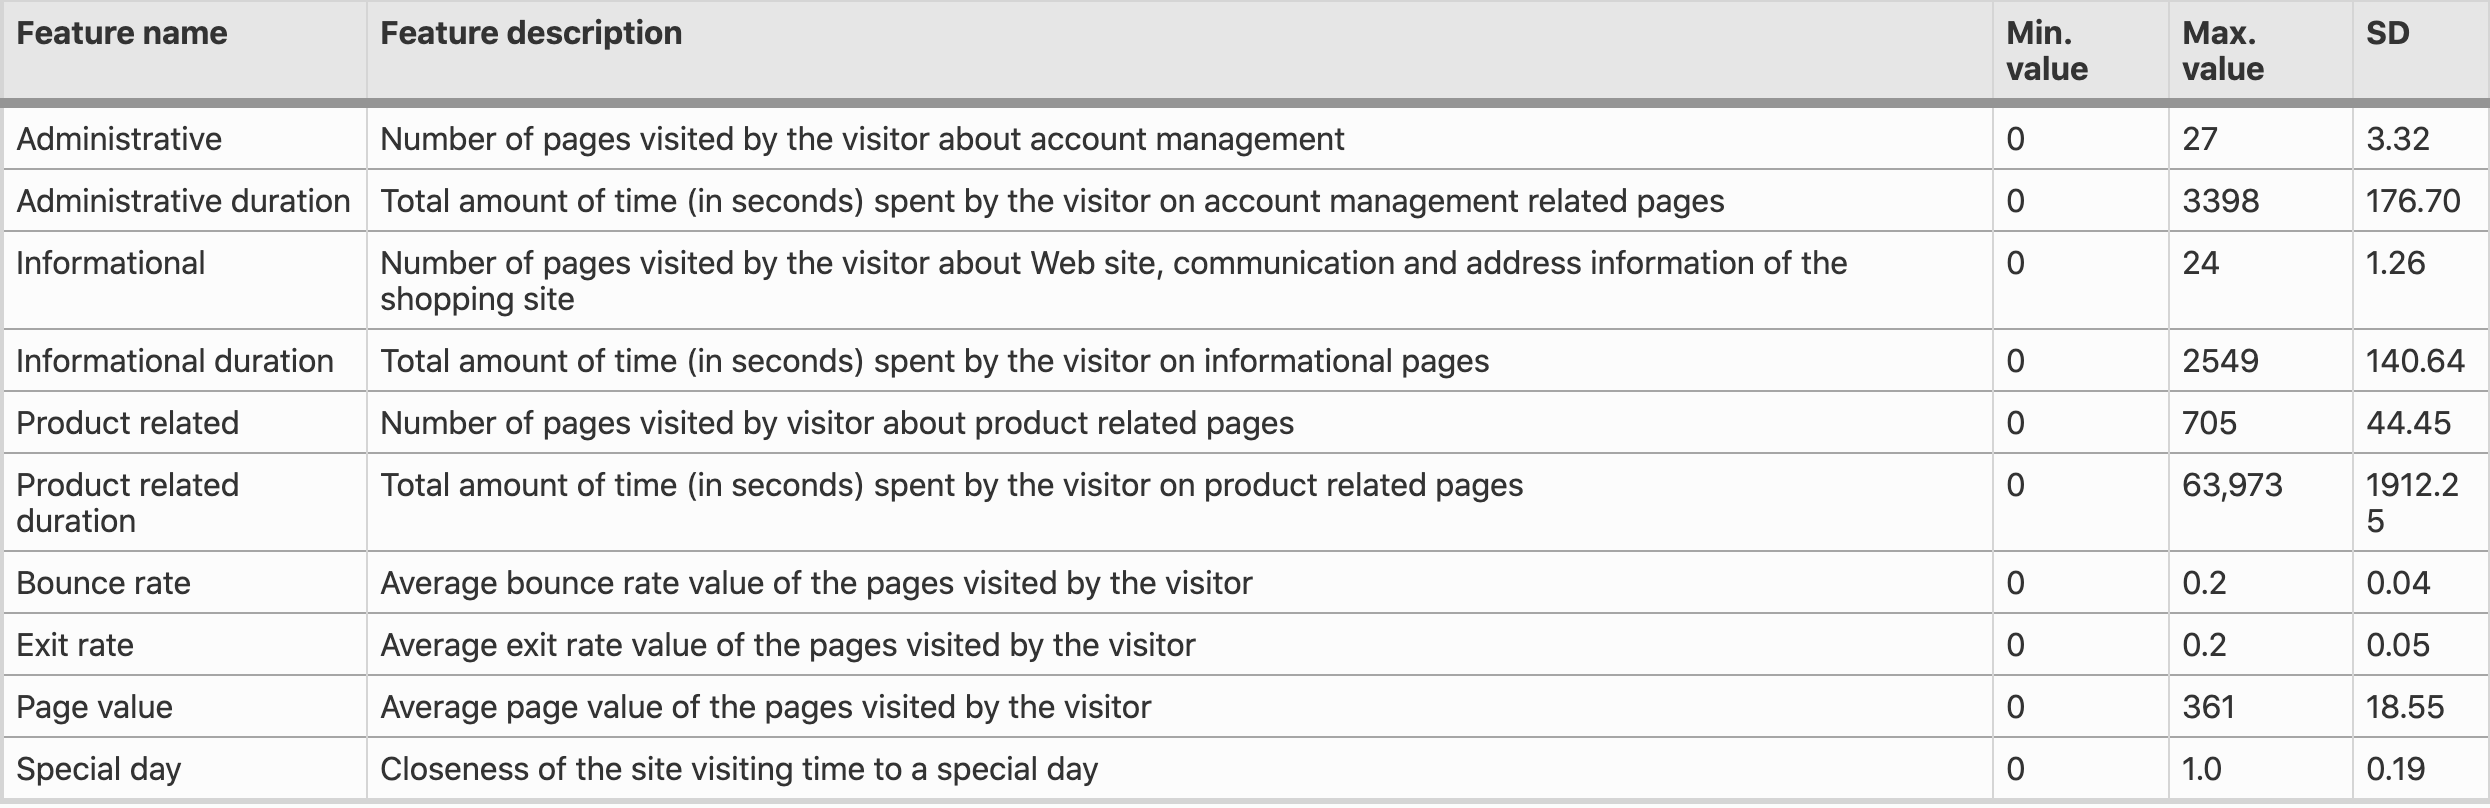
    
    <br>
    - Categorical Feature descriptions
    
    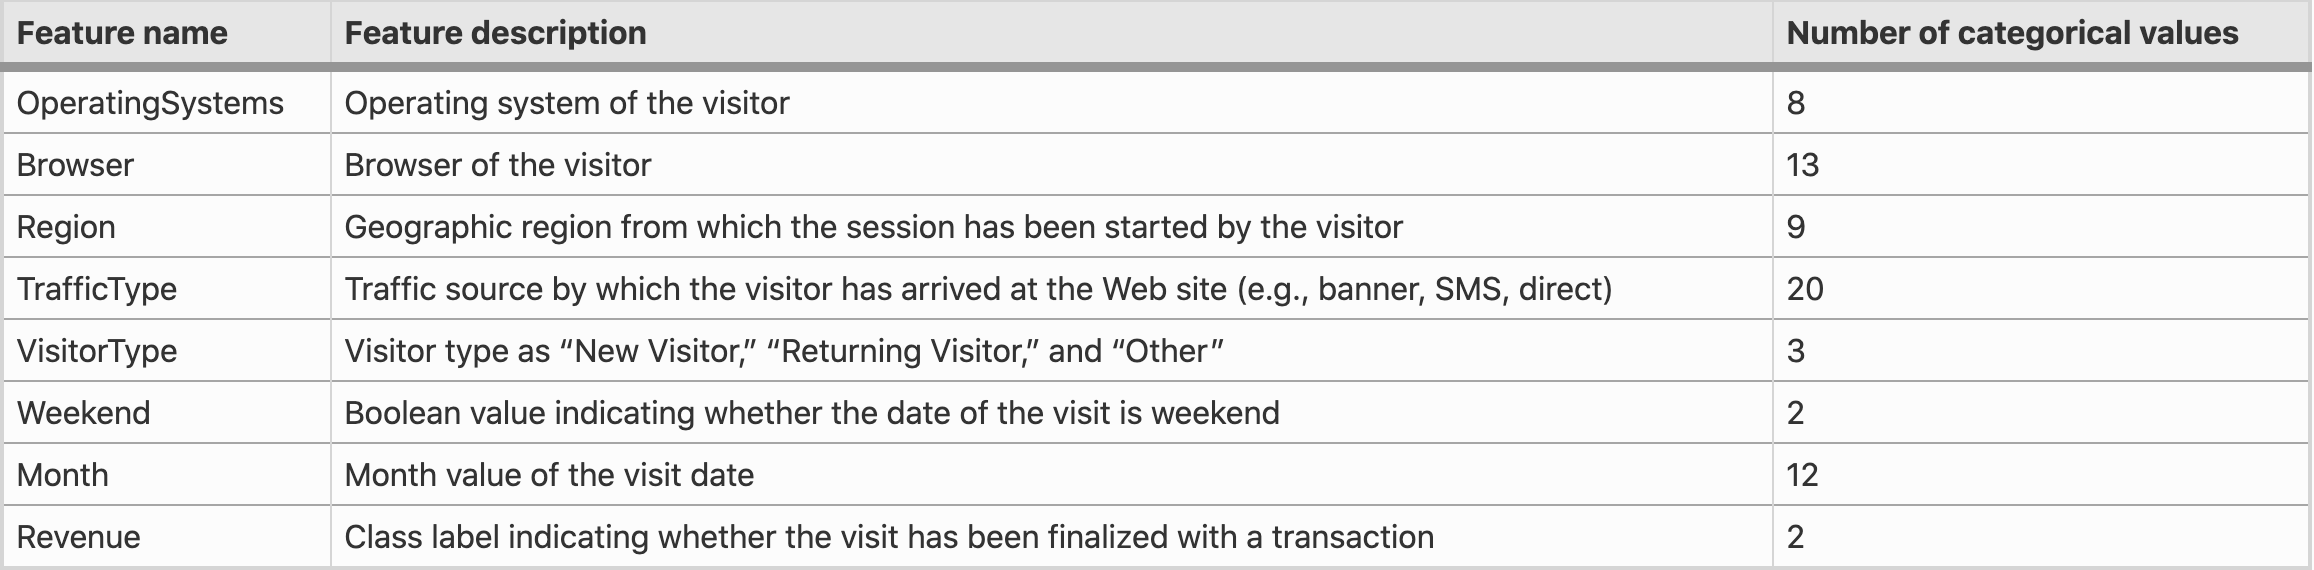
    

## Define the Problem (10%)

## Data Preprocessing and Vizualization (25%)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
raw_data = pd.read_csv("online_shoppers_intention.csv")
#no missing values in data



df = raw_data
#print(df)

monthMap = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
visitorMap = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3}
weekendMap = {False: 0, True:  1}
revenueMap = {False: 0 , True: 1}

df.Month = df.Month.map(monthMap)
df.VisitorType = df.VisitorType.map(visitorMap)
df.Weekend = df.Weekend.map(weekendMap)
df.Revenue = df.Revenue.map(revenueMap)
#print(df)

X = df.iloc[:, :-1]
y = df.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)


normalized_X = preprocessing.normalize(X)
NX_train, NX_test, Ny_train, Ny_test = train_test_split(normalized_X, y, test_size=0.45, random_state=42)

standardized_X = preprocessing.scale(X)

count = 0
for i in range(len(df)):
    if df['Administrative_Duration'][i] == 0:
        count +=1
print(count/12330*100)
        

In [ ]:
from sklearn import model_selection
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma='auto'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Logistic Regression" : LogisticRegression()}

keys = list(clfs.keys())
values = list(clfs.values())


def classify(X_train,X_test,y_train,y_test):

    AUCS = []
    accuracies = []
    i=0
    for c in clfs.values():
        c.fit(X_train,y_train)
        y_pred = c.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        print("AUC using",keys[i], ":",auc)
        print("Accuracy using",keys[i], ":",accuracy)
        i+=1
        AUCS.append(auc)
        accuracies.append(accuracy)
        
    #return (list(AUCS))
    
'''
kf = KFold(n_splits=4)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
'''    
    
for v in values:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(v,X,y,cv=kfold,scoring='accuracy_score')
    print(v," ",cv_results)
    

In [ ]:
#outliers?
import numpy as np
import matplotlib.pyplot as plt

anomalies = []

# multiply and add by random numbers to get some real values


# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies






## Model Construction (45%)

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score

#SVC
clf = SVC(gamma= 'auto')
clf.fit(X_train, y_train)
print(clf.predict(X_test))
prob = clf.predict(X_test)
auc = roc_auc_score(y_test, prob)
print(accuracy_score(y_test, prob))
print("R2: ", r2_score(y_test,prob))


#random forest
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train, y_train)
RandomForestClassifier(max_depth=2, random_state=0)
print(clf1.feature_importances_)
print(clf1.predict(X_test))
prob1 = clf1.predict(X_test)
auc = roc_auc_score(y_test, prob1)
print(accuracy_score(y_test, prob1))
print(auc)
print("R2 RF: ", r2_score(y_test,prob1))

#KNN
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(NX_train, Ny_train)
prob2 = clf2.predict(NX_test)
print(accuracy_score(Ny_test,prob2))

print("R2 KNN: ", r2_score(y_test,prob2))

#pca
pca = PCA(n_components = 2)
pca.fit(NX_train)
print(pca.explained_variance_ratio_)

#logreg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print(accuracy_score(y_test, pred))
print("R2 LR: ", r2_score(y_test,pred))


## Future Plans (10%)